In [1]:
## Training a machine learning model with scikit-learn
## knn optimization

In [2]:
import numpy as np

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/Users/tpalczewski/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
knn = KNeighborsClassifier(n_neighbors=3)

## all parameters not defined in previous cell are set to their defaults

In [6]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [7]:
## Of course we need some data to make a data science :) 

## let's make feature matrix (X) and response vector (y)

In [8]:
N=5000 # Number of observations
M = 2 # Number of features
list_of_eveything = np.random.random((N,M))
print(list_of_eveything)

X = list_of_eveything

[[ 0.57456257  0.07393532]
 [ 0.9011649   0.43679376]
 [ 0.35486495  0.43520357]
 ..., 
 [ 0.96116112  0.36625708]
 [ 0.24104926  0.32282705]
 [ 0.46788196  0.76102012]]


In [9]:
what_is_what = np.random.randint(2, size=(N)) 
print(what_is_what)
# list of zeros (bkg) and ones (signal) 

y = what_is_what

[0 1 0 ..., 0 1 1]


In [10]:
print(X.shape)
print(y.shape)

(5000, 2)
(5000,)


In [11]:
## Fit the model with data (model training)

knn.fit(X, y)

## Now we have a model so we can for example predict the response for a new observation

knn.predict([[0.2, 0.2]])

array([1])

[x_min, x_max] = [-0.199935967802, 1.19998412718]
[y_min, y_max] = [-0.199675764243, 1.19977443142]


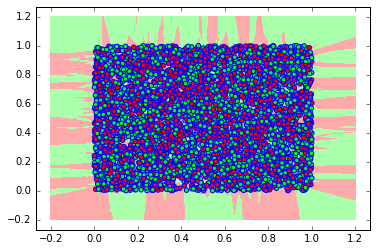

In [12]:
## Plot the decision boundary; 
## Assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

print("[x_min, x_max] = [" + str(x_min) + ", " + str(x_max) + "]")

print("[y_min, y_max] = [" + str(y_min) + ", " + str(y_max) + "]")

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

## Now we have the result so let's make tha plot of the decision boundary 

## Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

## Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='b', s=20)
plt.axis('tight')
plt.show()

In [13]:
## Nice, we have our clasifier up and running. Of course now we can check how this picture changes with k 

In [14]:
# try K=1 through K=35 and record testing accuracy
k_range = list(range(1, 36))
scores = []
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X, y)
    y_pred = knn2.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

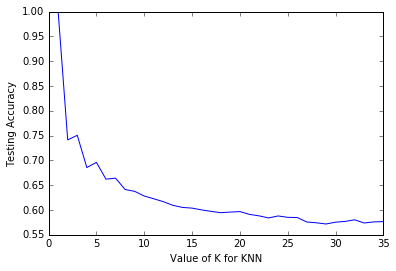

In [15]:
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')